In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
plt.style.use('classic')
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name=1)

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
#DataReport
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 5630 
The number of columns (variables) is 20


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  3
Phone           1231
Computer        1634
Mobile Phone    2765
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  7
Cash on Delivery     149
CC                   273
COD                  365
UPI                  414
E wallet             614
Credit Card         1501
Debit Card          2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  6
Others                 264
Grocery                410
Mobile                 809
Fashion                826
Mobile Phone          1271
Laptop & Accessory    2050
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




In [8]:
df['PreferredLoginDevice']=np.where(df['PreferredLoginDevice'] == 'Mobile Phone','Phone',df['PreferredLoginDevice'])
df['PreferredPaymentMode']=np.where(df['PreferredPaymentMode'] == 'Cash on Delivery','COD',df['PreferredPaymentMode'])
df['PreferredPaymentMode']=np.where(df['PreferredPaymentMode'] == 'CC','Credit Card',df['PreferredPaymentMode'])
df['PreferedOrderCat']=np.where(df['PreferedOrderCat'] == 'Mobile Phone','Mobile',df['PreferedOrderCat'])

In [9]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

PREFERREDLOGINDEVICE :  2
Computer    1634
Phone       3996
Name: PreferredLoginDevice, dtype: int64


PREFERREDPAYMENTMODE :  5
UPI             414
COD             514
E wallet        614
Credit Card    1774
Debit Card     2314
Name: PreferredPaymentMode, dtype: int64


GENDER :  2
Female    2246
Male      3384
Name: Gender, dtype: int64


PREFEREDORDERCAT :  5
Others                 264
Grocery                410
Fashion                826
Laptop & Accessory    2050
Mobile                2080
Name: PreferedOrderCat, dtype: int64


MARITALSTATUS :  3
Divorced     848
Single      1796
Married     2986
Name: MaritalStatus, dtype: int64




In [10]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [11]:
#skewness
df.skew()

CustomerID                     0.000000
Churn                          1.772843
Tenure                         0.736513
CityTier                       0.735326
WarehouseToHome                1.619154
HourSpendOnApp                -0.027213
NumberOfDeviceRegistered      -0.396969
SatisfactionScore             -0.142626
NumberOfAddress                1.088639
Complain                       0.953347
OrderAmountHikeFromlastYear    0.790785
CouponUsed                     2.545653
OrderCount                     2.196414
DaySinceLastOrder              1.191000
CashbackAmount                 1.149846
dtype: float64

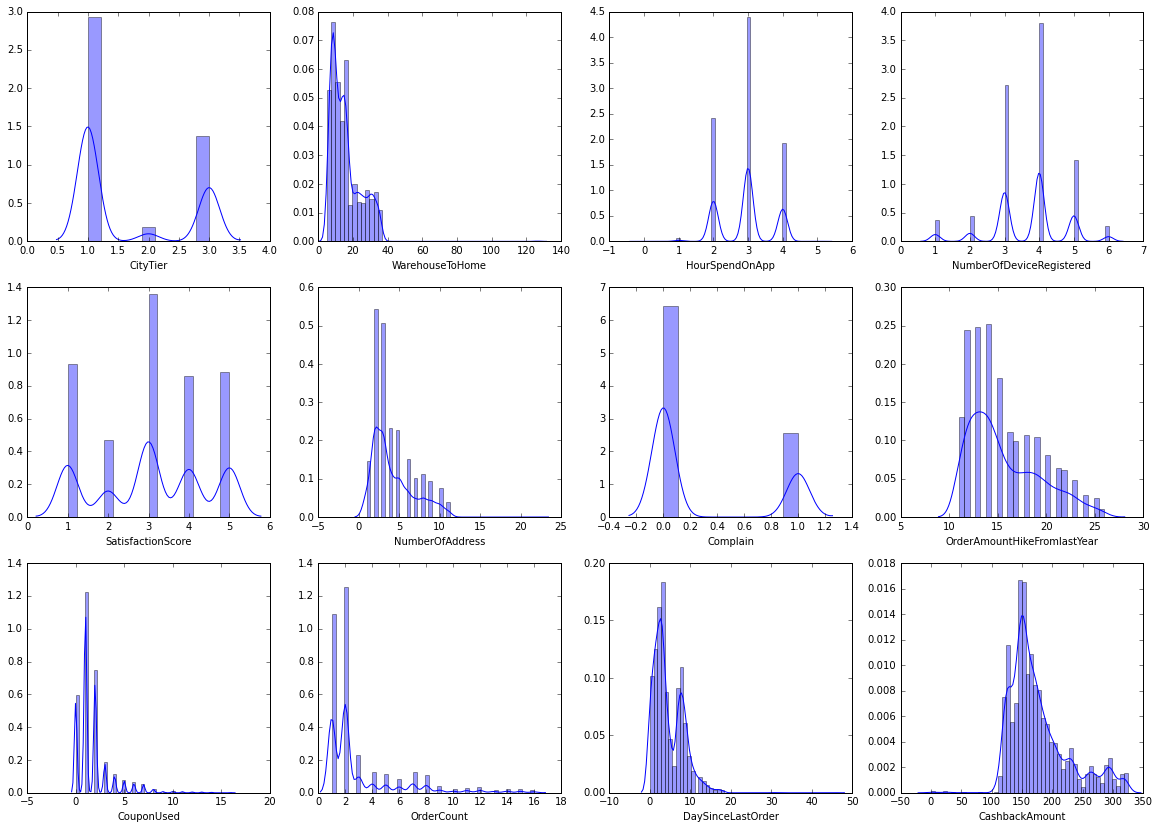

In [12]:
#EDA
#Univariate analysis
fig, axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(20,14)

#a = sns.distplot(df['Tenure'] , ax=axes[0][1])
a = sns.distplot(df['CityTier'] , ax=axes[0][0])
a = sns.distplot(df['WarehouseToHome'] , ax=axes[0][1])
a = sns.distplot(df['HourSpendOnApp'] , ax=axes[0][2])
a = sns.distplot(df['NumberOfDeviceRegistered'] , ax=axes[0][3])
a = sns.distplot(df['SatisfactionScore'] , ax=axes[1][0])
a = sns.distplot(df['NumberOfAddress'] , ax=axes[1][1])
a = sns.distplot(df['Complain'] , ax=axes[1][2])
a = sns.distplot(df['OrderAmountHikeFromlastYear'] , ax=axes[1][3])
a = sns.distplot(df['CouponUsed'] , ax=axes[2][0])
a = sns.distplot(df['OrderCount'] , ax=axes[2][1])
a = sns.distplot(df['DaySinceLastOrder'] , ax=axes[2][2])
a = sns.distplot(df['CashbackAmount'] , ax=axes[2][3])

plt.show()

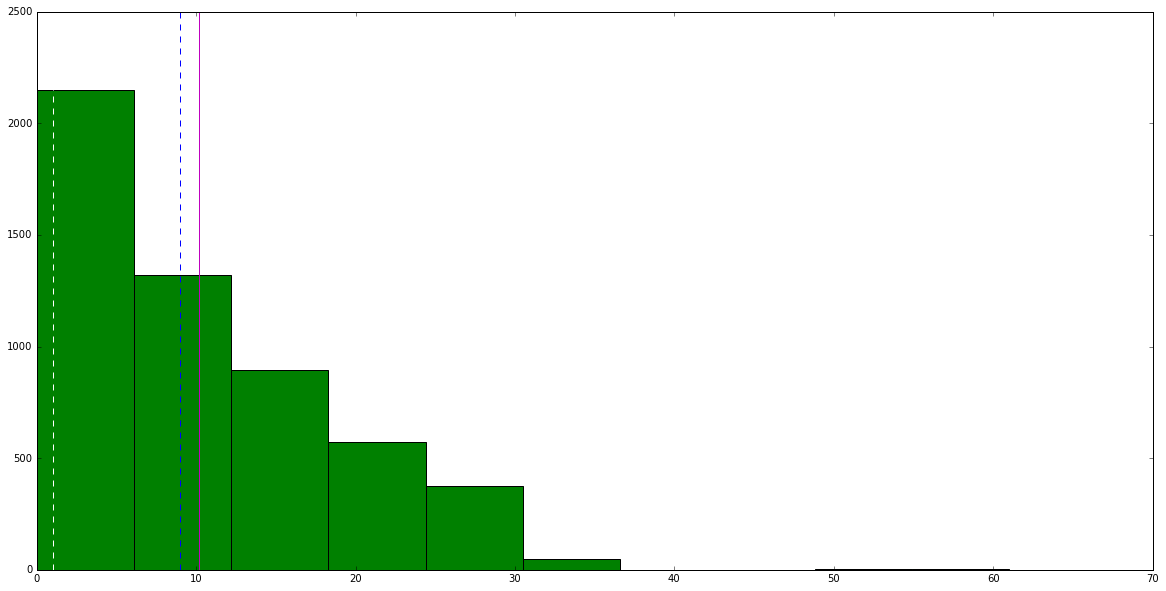

In [13]:
plt.figure(figsize=(20,10)) # makes the plot wider
plt.hist(df.Tenure, color='g') # plots a simple histogram
plt.axvline(df.Tenure.mean(), color='m', linewidth=1)
plt.axvline(df.Tenure.median(), color='b', linestyle='dashed', linewidth=1)
plt.axvline(df.Tenure.mode()[0], color='w', linestyle='dashed', linewidth=1)

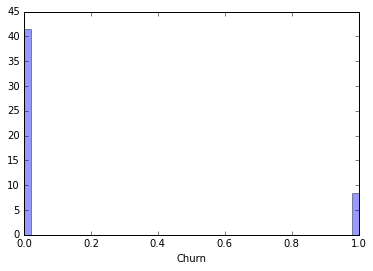

In [14]:
sns.distplot(df['Churn'])

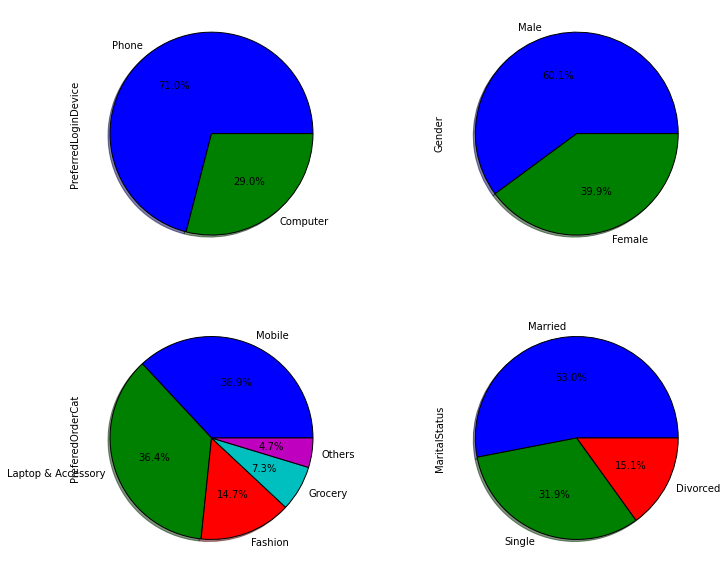

In [15]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)

a = df['PreferredLoginDevice'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][0])
a = df['Gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[0][1])
a = df['PreferedOrderCat'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][0])
a = df['MaritalStatus'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True, ax=axes[1][1])

plt.show()

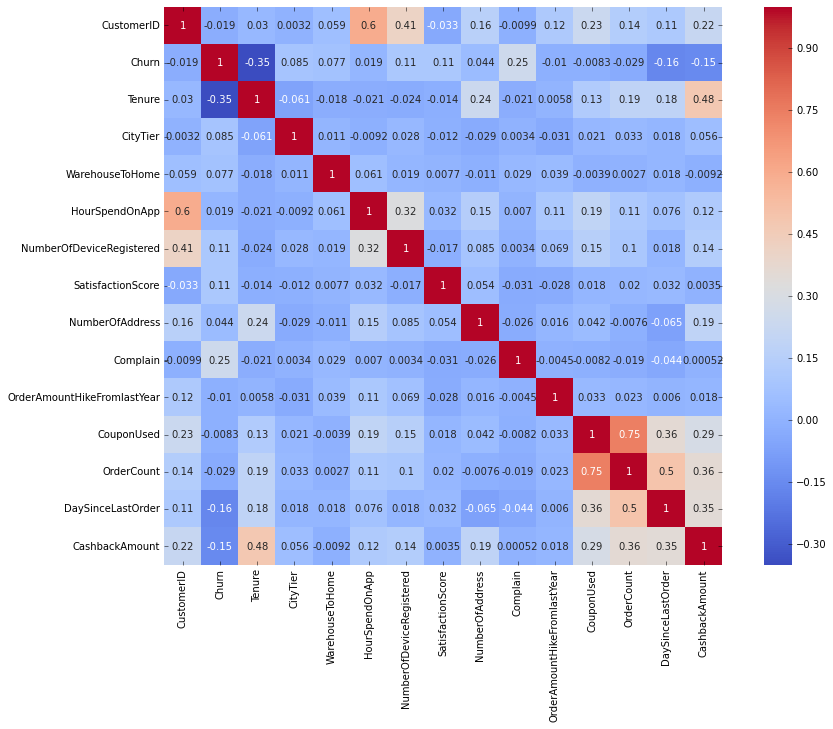

In [16]:
#Heatmap
plt.figure(figsize=(15,10))
p=sns.heatmap(df.corr(), annot=True,cmap='coolwarm',square=True)

In [17]:
df.drop(['CouponUsed'], axis=1, inplace=True)

In [18]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [19]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)    
        
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

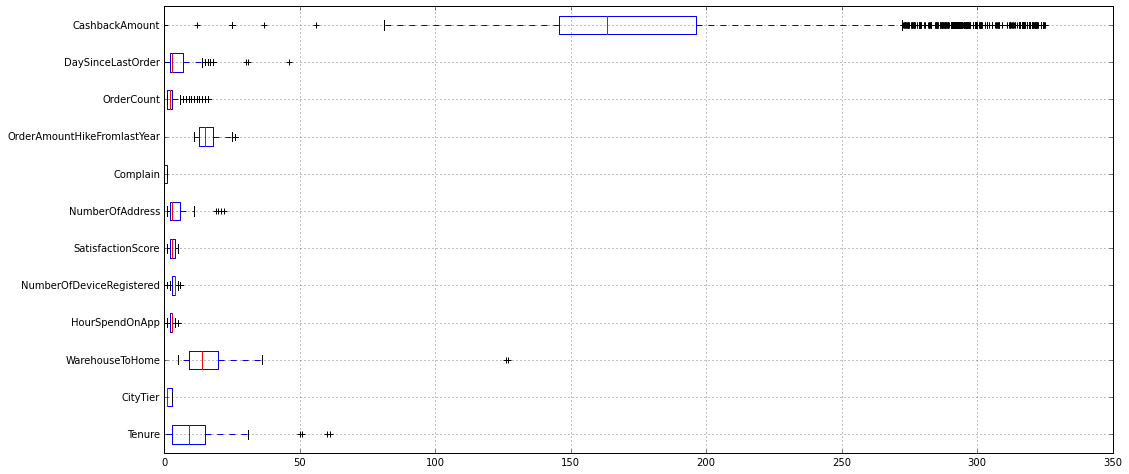

In [20]:
# Outliers_construct box plot
plt.figure(figsize=(17,8))
df.drop(['CustomerID', 'Churn'], axis=1).boxplot(vert=0)

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in df.drop(['CustomerID','Churn'], axis=1).columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

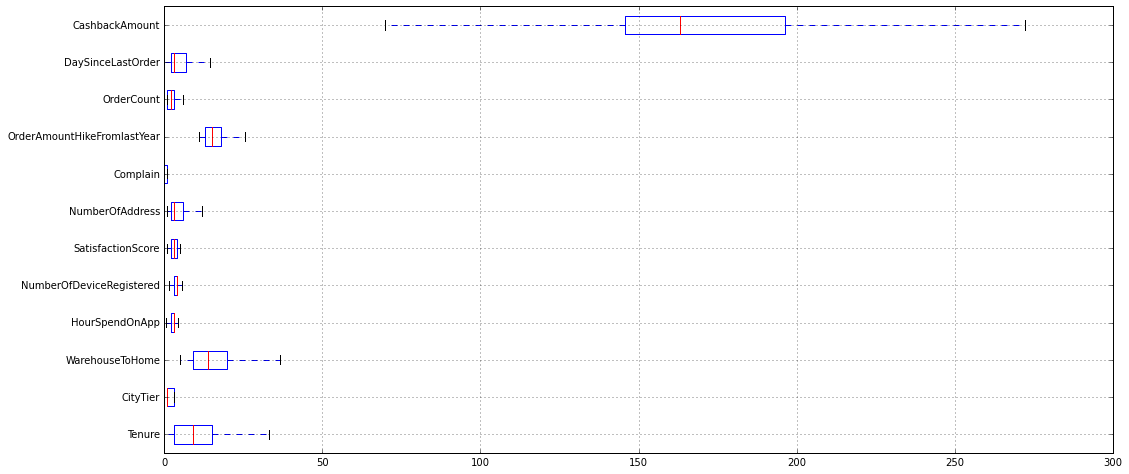

In [23]:
# Outliers_construct box plot
plt.figure(figsize=(17,8))
df.drop(['CustomerID', 'Churn'], axis=1).boxplot(vert=0)

In [24]:
df['CityTier'] = df['CityTier'].astype('object',copy=False)

In [25]:
#df.to_csv('C:/Users/User/Documents/DSBA/Capstone Project/df.csv',  index=False) #for clustering analysis using Knime

In [26]:
from sklearn.preprocessing import LabelEncoder   # import label encoder

labelencoder = LabelEncoder()  

df['PreferredLoginDevice'] = labelencoder.fit_transform(df.PreferredLoginDevice) # returns label encoded variable(s)
df['PreferredPaymentMode'] = labelencoder.fit_transform(df.PreferredPaymentMode) # returns label encoded variable(s)
df['Gender'] = labelencoder.fit_transform(df.Gender) # returns label encoded variable(s)
df['PreferedOrderCat'] = labelencoder.fit_transform(df.PreferedOrderCat) # returns label encoded variable(s)
df['MaritalStatus'] = labelencoder.fit_transform(df.MaritalStatus) # returns label encoded variable(s)
df['CityTier'] = labelencoder.fit_transform(df.MaritalStatus) # returns label encoded variable(s)
df.head().T

,0,1,2,3,4
CustomerID,50001.00,50002.0,50003.00,50004.00,50005.0
Churn,1.00,1.0,1.00,1.00,1.0
Tenure,4.00,9.0,9.00,0.00,0.0
PreferredLoginDevice,1.00,1.0,1.00,1.00,1.0
CityTier,2.00,2.0,2.00,2.00,2.0
WarehouseToHome,6.00,8.0,30.00,15.00,12.0
PreferredPaymentMode,2.00,4.0,2.00,2.00,1.0
Gender,0.00,1.0,1.00,1.00,1.0
HourSpendOnApp,3.00,3.0,2.00,2.00,3.0
NumberOfDeviceRegistered,3.00,4.0,4.00,4.00,3.0


In [27]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [28]:
df.Churn.sum() / len(df.Churn)

0.16838365896980462

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [30]:
X = df.drop(['CustomerID','Churn'], axis=1)
y = df['Churn']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [32]:
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [33]:
clf = LinearDiscriminantAnalysis()
model_lda=clf.fit(X_train,y_train)
model_lda

LinearDiscriminantAnalysis()

In [34]:
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [36]:
SVM_model= svm.SVC(kernel='linear', probability=True)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [37]:
from sklearn.neural_network import MLPClassifier

clf_ann = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=1,tol=0.01)

In [38]:
# Fit the model on the training data
clf_ann.fit(X_train, y_train)

Iteration 1, loss = 4.92157772
Iteration 2, loss = 0.37850012
Iteration 3, loss = 0.37037973
Iteration 4, loss = 0.36750863
Iteration 5, loss = 0.36297984
Iteration 6, loss = 0.36102184
Iteration 7, loss = 0.35831697
Iteration 8, loss = 0.35643067
Iteration 9, loss = 0.35701208
Iteration 10, loss = 0.35571677
Iteration 11, loss = 0.35493176
Iteration 12, loss = 0.35144153
Iteration 13, loss = 0.35179110
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=100, max_iter=5000, random_state=1,
              solver='sgd', tol=0.01, verbose=True)

In [39]:
#logestic
y_log_train_predict = model_log.predict(X_train)
y_log_test_predict = model_log.predict(X_test)

In [40]:
y_log_train_predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [41]:
y_log_test_predict

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [42]:
# Accuracy - Training Data
model_log.score(X_train,y_train)

0.7749302207561533

In [43]:
# Accuracy - Testing Data
model_log.score(X_test,y_test)

0.7655417406749556

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85      3269
           1       0.42      0.82      0.55       672

    accuracy                           0.77      3941
   macro avg       0.69      0.79      0.70      3941
weighted avg       0.86      0.77      0.80      3941



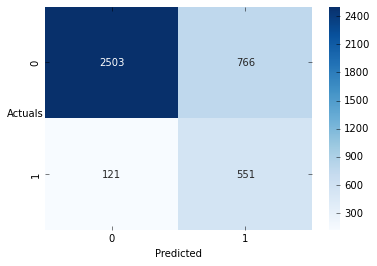

In [44]:
sns.heatmap((metrics.confusion_matrix(y_train, y_log_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_log_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.76      0.84      1413
           1       0.39      0.81      0.53       276

    accuracy                           0.77      1689
   macro avg       0.67      0.78      0.69      1689
weighted avg       0.86      0.77      0.79      1689



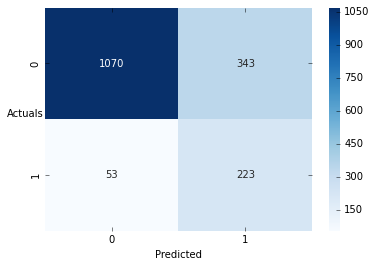

In [45]:
sns.heatmap((metrics.confusion_matrix(y_test, y_log_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_log_test_predict))

AUC: 0.862


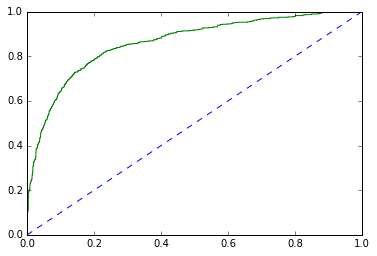

In [46]:
# predict probabilities
probs_log_train = model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_log_train = probs_log_train[:, 1]
# calculate AUC
auc_log_train = roc_auc_score(y_train, probs_log_train)
print('AUC: %.3f' % auc_log_train)
# calculate roc curve
train_fpr_log, train_tpr_log, train_thresholds_log = roc_curve(y_train, probs_log_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log, train_tpr_log)

AUC: 0.868


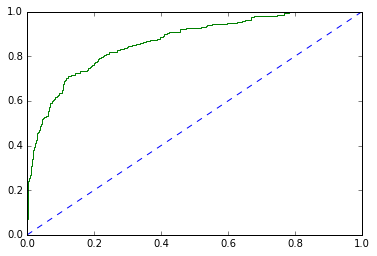

In [47]:
# predict probabilities
probs_log_test = model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_log_test = probs_log_test[:, 1]
# calculate AUC
auc_log_test = roc_auc_score(y_test, probs_log_test)
print('AUC: %.3f' % auc_log_test)
# calculate roc curve
test_fpr_log, test_tpr_log, test_thresholds_log = roc_curve(y_test, probs_log_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log, test_tpr_log)

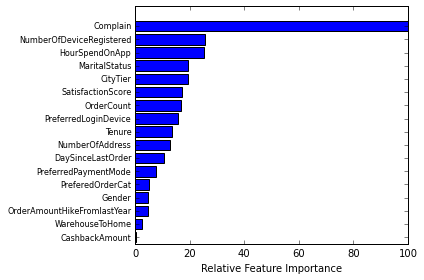

In [48]:
feature_importance = abs(model_log.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sort = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
mod = fig.add_subplot(1, 1, 1)
mod.barh(sort, feature_importance[sorted_idx], align='center')
mod.set_yticks(sort)
mod.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
mod.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [49]:
#LDA
y_lda_train_predict = model_lda.predict(X_train)
y_lda_test_predict = model_lda.predict(X_test)

In [50]:
y_lda_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
y_lda_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
# Accuracy - Training Data
model_lda.score(X_train,y_train)

0.8751585891905608

In [53]:
# Accuracy - Testing Data
model_lda.score(X_test,y_test)

0.881586737714624

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3269
           1       0.73      0.42      0.53       672

    accuracy                           0.88      3941
   macro avg       0.81      0.69      0.73      3941
weighted avg       0.86      0.88      0.86      3941



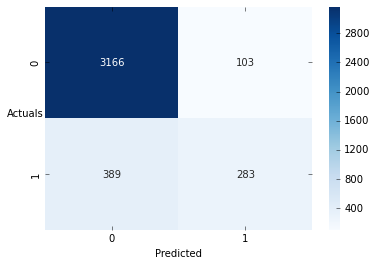

In [54]:
sns.heatmap((metrics.confusion_matrix(y_train, y_lda_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_lda_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1413
           1       0.76      0.40      0.53       276

    accuracy                           0.88      1689
   macro avg       0.83      0.69      0.73      1689
weighted avg       0.87      0.88      0.87      1689



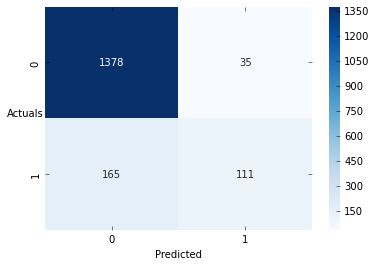

In [55]:
sns.heatmap((metrics.confusion_matrix(y_test, y_lda_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_lda_test_predict))

AUC: 0.857


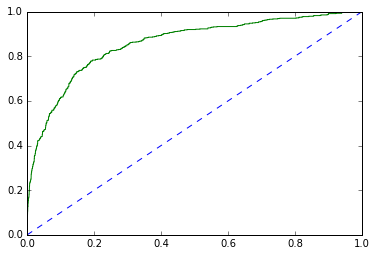

In [56]:
# predict probabilities
probs_lda_train = model_lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_lda_train = probs_lda_train[:, 1]
# calculate AUC
auc_lda_train = roc_auc_score(y_train, probs_lda_train)
print('AUC: %.3f' % auc_lda_train)
# calculate roc curve
train_fpr_lda, train_tpr_lda, train_thresholds_lda = roc_curve(y_train, probs_lda_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_lda, train_tpr_lda)

AUC: 0.869


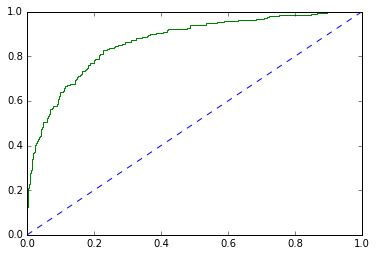

In [57]:
# predict probabilities
probs_lda_test = model_lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_lda_test = probs_lda_test[:, 1]
# calculate AUC
auc_lda_test = roc_auc_score(y_test, probs_lda_test)
print('AUC: %.3f' % auc_lda_test)
# calculate roc curve
test_fpr_lda, test_tpr_lda, test_thresholds_lda = roc_curve(y_test, probs_lda_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_lda, test_tpr_lda)

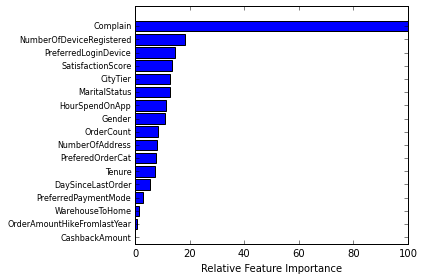

In [58]:
feature_importance = abs(model_lda.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sort = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
mod = fig.add_subplot(1, 1, 1)
mod.barh(sort, feature_importance[sorted_idx], align='center')
mod.set_yticks(sort)
mod.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
mod.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [59]:
#KNN
y_knn_train_predict = KNN_model.predict(X_train)
y_knn_test_predict = KNN_model.predict(X_test)

In [60]:
y_knn_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [61]:
y_knn_test_predict

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
# Accuracy - Training Data
KNN_model.score(X_train,y_train)

0.9023090586145648

In [63]:
# Accuracy - Testing Data
KNN_model.score(X_test,y_test)

0.8644168146832445

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      3269
           1       0.80      0.56      0.66       672

    accuracy                           0.90      3941
   macro avg       0.86      0.77      0.80      3941
weighted avg       0.90      0.90      0.90      3941



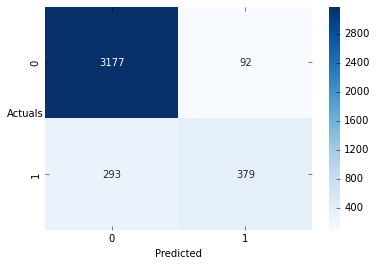

In [64]:
sns.heatmap((metrics.confusion_matrix(y_train, y_knn_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_knn_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1413
           1       0.62      0.43      0.51       276

    accuracy                           0.86      1689
   macro avg       0.76      0.69      0.72      1689
weighted avg       0.85      0.86      0.85      1689



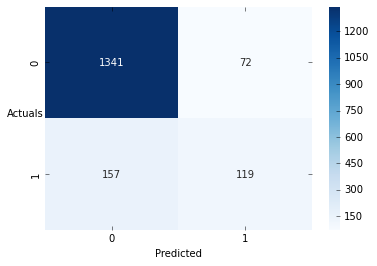

In [65]:
sns.heatmap((metrics.confusion_matrix(y_test, y_knn_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_knn_test_predict))

AUC: 0.956


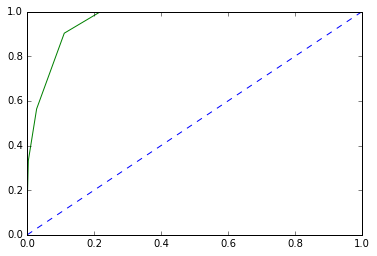

In [66]:
# predict probabilities
probs_knn_train = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_knn_train = probs_knn_train[:, 1]
# calculate AUC
auc_knn_train = roc_auc_score(y_train, probs_knn_train)
print('AUC: %.3f' % auc_knn_train)
# calculate roc curve
train_fpr_knn, train_tpr_knn, train_thresholds_knn = roc_curve(y_train, probs_knn_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_knn, train_tpr_knn)

AUC: 0.859


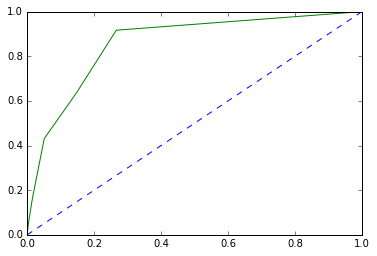

In [67]:
# predict probabilities
probs_knn_test = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_knn_test = probs_knn_test[:, 1]
# calculate AUC
auc_knn_test = roc_auc_score(y_test, probs_knn_test)
print('AUC: %.3f' % auc_knn_test)
# calculate roc curve
test_fpr_knn, test_tpr_knn, test_thresholds_knn = roc_curve(y_test, probs_knn_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_knn, test_tpr_knn)

In [68]:
#Naive Bayes
y_nb_train_predict = NB_model.predict(X_train)
y_nb_test_predict = NB_model.predict(X_test)

In [69]:
y_nb_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [70]:
y_nb_test_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [71]:
# Accuracy - Training Data
NB_model.score(X_train,y_train)

0.8513067749302208

In [72]:
# Accuracy - Testing Data
NB_model.score(X_test,y_test)

0.8703374777975134

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3269
           1       0.56      0.57      0.57       672

    accuracy                           0.85      3941
   macro avg       0.74      0.74      0.74      3941
weighted avg       0.85      0.85      0.85      3941



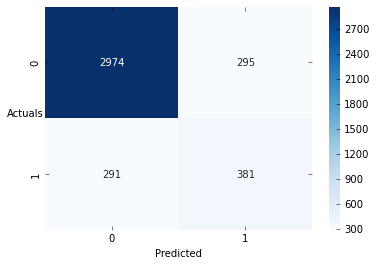

In [73]:
sns.heatmap((metrics.confusion_matrix(y_train, y_nb_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_nb_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      1413
           1       0.60      0.62      0.61       276

    accuracy                           0.87      1689
   macro avg       0.76      0.77      0.77      1689
weighted avg       0.87      0.87      0.87      1689



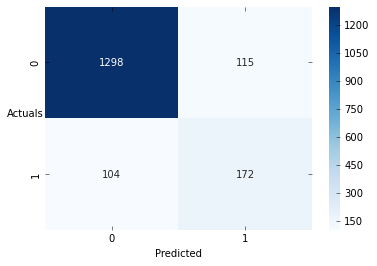

In [74]:
sns.heatmap((metrics.confusion_matrix(y_test, y_nb_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_nb_test_predict))

AUC: 0.821


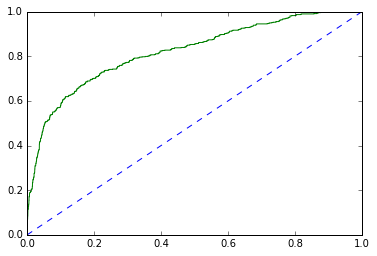

In [75]:
# predict probabilities
probs_nb_train = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_nb_train = probs_nb_train[:, 1]
# calculate AUC
auc_nb_train = roc_auc_score(y_train, probs_nb_train)
print('AUC: %.3f' % auc_nb_train)
# calculate roc curve
train_fpr_nb, train_tpr_nb, train_thresholds_nb = roc_curve(y_train, probs_nb_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_nb, train_tpr_nb)

AUC: 0.847


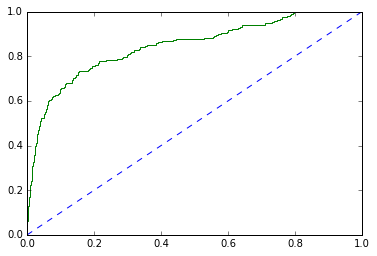

In [76]:
# predict probabilities
probs_nb_test = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_nb_test = probs_nb_test[:, 1]
# calculate AUC
auc_nb_test = roc_auc_score(y_test, probs_nb_test)
print('AUC: %.3f' % auc_nb_test)
# calculate roc curve
test_fpr_nb, test_tpr_nb, test_thresholds_nb = roc_curve(y_test, probs_nb_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_nb, test_tpr_nb)

In [77]:
#SVM
y_svm_train_predict = SVM_model.predict(X_train)
y_svm_test_predict = SVM_model.predict(X_test)

In [78]:
y_svm_train_predict

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [79]:
y_svm_test_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [80]:
#Accuracy - Training Data
SVM_model.score(X_train,y_train)

0.8756660746003553

In [81]:
#Accuracy - Testing Data
SVM_model.score(X_test,y_test)

0.8833629366489046

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      3269
           1       0.75      0.40      0.53       672

    accuracy                           0.88      3941
   macro avg       0.82      0.69      0.73      3941
weighted avg       0.86      0.88      0.86      3941



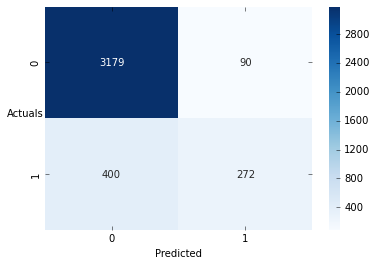

In [82]:
sns.heatmap((metrics.confusion_matrix(y_train, y_svm_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_svm_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1413
           1       0.77      0.41      0.53       276

    accuracy                           0.88      1689
   macro avg       0.83      0.69      0.73      1689
weighted avg       0.87      0.88      0.87      1689



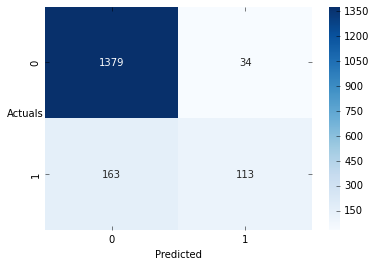

In [83]:
sns.heatmap((metrics.confusion_matrix(y_test, y_svm_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_svm_test_predict))

AUC: 0.863


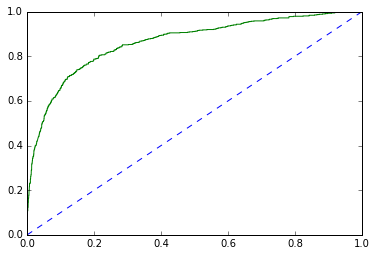

In [84]:
# predict probabilities
probs_svm_train = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_svm_train = probs_svm_train[:, 1]
# calculate AUC
auc_svm_train = roc_auc_score(y_train, probs_svm_train)
print('AUC: %.3f' % auc_svm_train)
# calculate roc curve
train_fpr_svm, train_tpr_svm, train_thresholds_svm = roc_curve(y_train, probs_svm_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_svm, train_tpr_svm)

AUC: 0.874


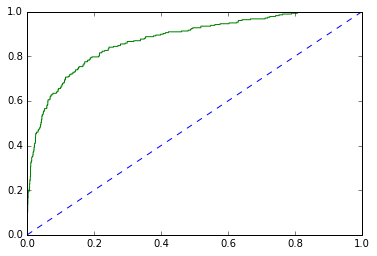

In [85]:
# predict probabilities
probs_svm_test = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_svm_test = probs_svm_test[:, 1]
# calculate AUC
auc_svm_test = roc_auc_score(y_test, probs_svm_test)
print('AUC: %.3f' % auc_svm_test)
# calculate roc curve
test_fpr_svm, test_tpr_svm, test_thresholds_svm = roc_curve(y_test, probs_svm_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_svm, test_tpr_svm)

In [86]:
#ANN
y_ann_train_predict = clf_ann.predict(X_train)
y_ann_test_predict = clf_ann.predict(X_test)

In [87]:
#Accuracy - Training Data
clf_ann.score(X_train,y_train)

0.8546054300938848

In [88]:
#Accuracy - Testing Data
clf_ann.score(X_test,y_test)

0.8656009473060983

Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      3269
           1       0.70      0.26      0.38       672

    accuracy                           0.85      3941
   macro avg       0.78      0.62      0.65      3941
weighted avg       0.84      0.85      0.83      3941



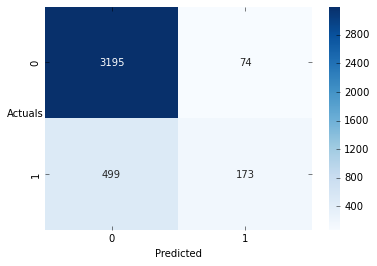

In [89]:
sns.heatmap((metrics.confusion_matrix(y_train, y_ann_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_ann_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92      1413
           1       0.72      0.29      0.42       276

    accuracy                           0.87      1689
   macro avg       0.80      0.64      0.67      1689
weighted avg       0.85      0.87      0.84      1689



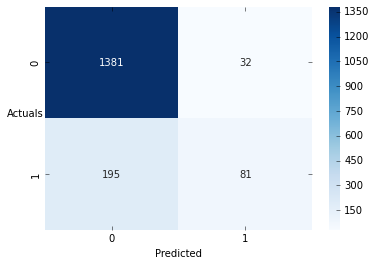

In [90]:
sns.heatmap((metrics.confusion_matrix(y_test, y_ann_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_ann_test_predict))

AUC: 0.830


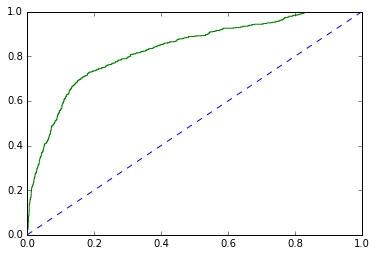

In [91]:
# predict probabilities
probs_ann_train = clf_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_ann_train = probs_ann_train[:, 1]
# calculate AUC
auc_ann_train = roc_auc_score(y_train, probs_ann_train)
print('AUC: %.3f' % auc_ann_train)
# calculate roc curve
train_fpr_ann, train_tpr_ann, train_thresholds_ann = roc_curve(y_train, probs_ann_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ann, train_tpr_ann)

AUC: 0.834


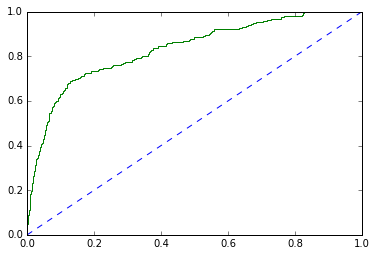

In [92]:
# predict probabilities
probs_ann_test = clf_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ann_test = probs_ann_test[:, 1]
# calculate AUC
auc_ann_test = roc_auc_score(y_test, probs_ann_test)
print('AUC: %.3f' % auc_ann_test)
# calculate roc curve
test_fpr_ann, test_tpr_ann, test_thresholds_ann = roc_curve(y_test, probs_ann_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ann, test_tpr_ann)

In [93]:
#Ensemble - Bagging
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [94]:
param_grid = {
    'max_depth': [7, 10, 15],
    'max_features': [6, 8, 10],
    'min_samples_leaf': [10, 15, 25],
    'min_samples_split': [15, 25, 50],
    'n_estimators': [301, 401, 501]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [95]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 10, 15], 'max_features': [6, 8, 10],
                         'min_samples_leaf': [10, 15, 25],
                         'min_samples_split': [15, 25, 50],
                         'n_estimators': [301, 401, 501]})

In [96]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 501}

In [97]:
best_grid_rf = grid_search_rf.best_estimator_

In [98]:
best_grid_rf

RandomForestClassifier(max_depth=10, max_features=8, min_samples_leaf=10,
                       min_samples_split=15, n_estimators=501)

In [99]:
#Boosting - Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [100]:
#Boosting - XGBoost
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [101]:
#Grid search Random Forest Classifier
y_best_grid_rf_train_predict = best_grid_rf.predict(X_train)
y_best_grid_rf_test_predict = best_grid_rf.predict(X_test)
print('Predict- Training data of Random Forest Classifier','\n',y_best_grid_rf_train_predict,'\n')
print('Predict- Testing data of Random Forest Classifier','\n',y_best_grid_rf_test_predict,'\n')

Predict- Training data of Random Forest Classifier 
 [0 1 0 ... 1 0 1] 

Predict- Testing data of Random Forest Classifier 
 [0 0 1 ... 0 0 0] 



In [102]:
#Accuracy
print('Accuracy- Training data of Random Forest Classifier','\n',best_grid_rf.score(X_train,y_train),'\n')
print('Accuracy- Testing data of Random Forest Classifier','\n',best_grid_rf.score(X_test,y_test),'\n')

Accuracy- Training data of Random Forest Classifier 
 0.9360568383658969 

Accuracy- Testing data of Random Forest Classifier 
 0.9147424511545293 



Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      3269
           1       0.90      0.70      0.79       672

    accuracy                           0.94      3941
   macro avg       0.92      0.84      0.88      3941
weighted avg       0.93      0.94      0.93      3941



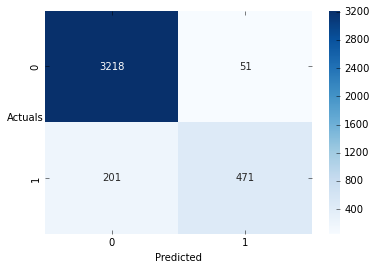

In [103]:
sns.heatmap((metrics.confusion_matrix(y_train, y_best_grid_rf_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_best_grid_rf_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1413
           1       0.80      0.64      0.71       276

    accuracy                           0.91      1689
   macro avg       0.86      0.80      0.83      1689
weighted avg       0.91      0.91      0.91      1689



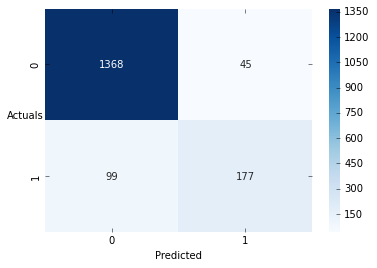

In [104]:
sns.heatmap((metrics.confusion_matrix(y_test, y_best_grid_rf_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_best_grid_rf_test_predict))

AUC: 0.978


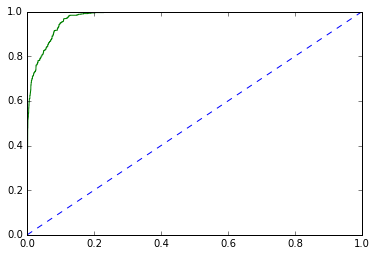

In [105]:
# predict probabilities
probs_best_grid_rf_train = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_best_grid_rf_train = probs_best_grid_rf_train[:, 1]
# calculate AUC
auc_best_grid_rf_train = roc_auc_score(y_train, probs_best_grid_rf_train)
print('AUC: %.3f' % auc_best_grid_rf_train)
# calculate roc curve
train_fpr_best_grid_rf, train_tpr_best_grid_rf, train_thresholds_best_grid_rf = roc_curve(y_train, probs_best_grid_rf_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_best_grid_rf, train_tpr_best_grid_rf)

AUC: 0.945


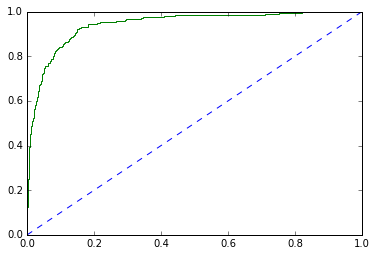

In [106]:
# predict probabilities
probs_best_grid_rf_test = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_best_grid_rf_test = probs_best_grid_rf_test[:, 1]
# calculate AUC
auc_best_grid_rf_test = roc_auc_score(y_test, probs_best_grid_rf_test)
print('AUC: %.3f' % auc_best_grid_rf_test)
# calculate roc curve
test_fpr_best_grid_rf, test_tpr_best_grid_rf, test_thresholds_best_grid_rf = roc_curve(y_test, probs_best_grid_rf_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_best_grid_rf, test_tpr_best_grid_rf)

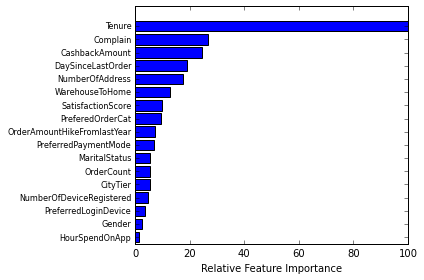

In [107]:
feature_importance = best_grid_rf.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sort = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
mod = fig.add_subplot(1, 1, 1)
mod.barh(sort, feature_importance[sorted_idx], align='center')
mod.set_yticks(sort)
mod.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
mod.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

In [108]:
#ADA_Boost_model
y_ADB_model_train_predict = ADB_model.predict(X_train)
y_ADB_model_test_predict = ADB_model.predict(X_test)
print('Predict- Training data of ADB_model','\n',y_ADB_model_train_predict,'\n')
print('Predict- Testing data of ADB_model','\n',y_ADB_model_test_predict,'\n')

Predict- Training data of ADB_model 
 [0 1 0 ... 1 0 1] 

Predict- Testing data of ADB_model 
 [0 0 1 ... 0 0 0] 



In [109]:
#Accuracy
print('Accuracy- Training data of ADB_model','\n',ADB_model.score(X_train,y_train),'\n')
print('Accuracy- Testing data of ADB_model','\n',ADB_model.score(X_test,y_test),'\n')

Accuracy- Training data of ADB_model 
 0.9015478304998731 

Accuracy- Testing data of ADB_model 
 0.8910597986974541 



Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      3269
           1       0.77      0.61      0.68       672

    accuracy                           0.90      3941
   macro avg       0.84      0.79      0.81      3941
weighted avg       0.90      0.90      0.90      3941



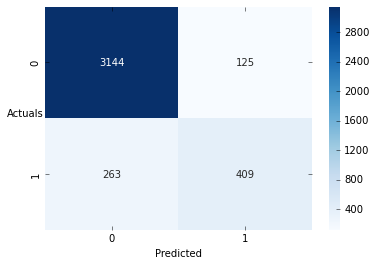

In [110]:
sns.heatmap((metrics.confusion_matrix(y_train, y_ADB_model_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_ADB_model_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      1413
           1       0.70      0.58      0.63       276

    accuracy                           0.89      1689
   macro avg       0.81      0.76      0.78      1689
weighted avg       0.88      0.89      0.89      1689



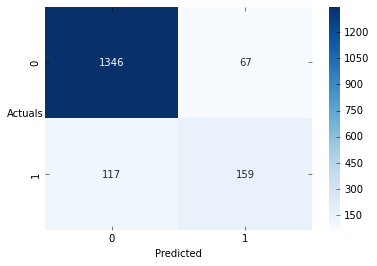

In [111]:
sns.heatmap((metrics.confusion_matrix(y_test, y_ADB_model_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_ADB_model_test_predict))

AUC: 0.933


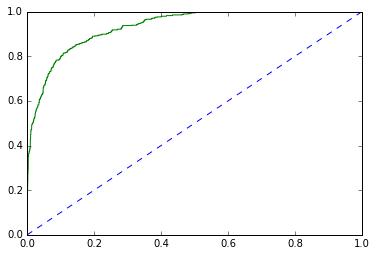

In [112]:
# predict probabilities
probs_ADB_model_train = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_ADB_model_train = probs_ADB_model_train[:, 1]
# calculate AUC
auc_ADB_model_train = roc_auc_score(y_train, probs_ADB_model_train)
print('AUC: %.3f' % auc_ADB_model_train)
# calculate roc curve
train_fpr_ADB_model, train_tpr_ADB_model, train_thresholds_ADB_model = roc_curve(y_train, probs_ADB_model_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_ADB_model, train_tpr_ADB_model)

AUC: 0.916


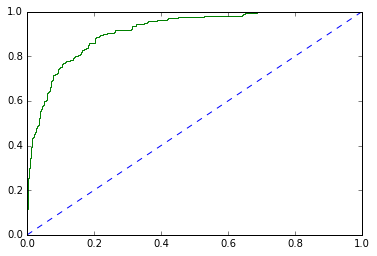

In [113]:
# predict probabilities
probs_ADB_model_test = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ADB_model_test = probs_ADB_model_test[:, 1]
# calculate AUC
auc_ADB_model_test = roc_auc_score(y_test, probs_ADB_model_test)
print('AUC: %.3f' % auc_ADB_model_test)
# calculate roc curve
test_fpr_ADB_model, test_tpr_ADB_model, test_thresholds_ADB_model = roc_curve(y_test, probs_ADB_model_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_ADB_model, test_tpr_ADB_model)

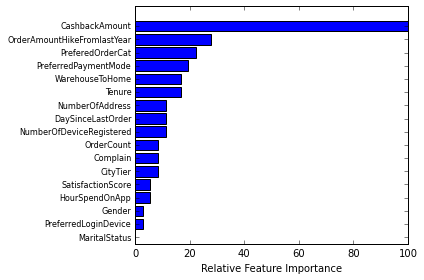

In [114]:
feature_importance = ADB_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sort = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
mod = fig.add_subplot(1, 1, 1)
mod.barh(sort, feature_importance[sorted_idx], align='center')
mod.set_yticks(sort)
mod.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
mod.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

In [115]:
#XGB_model
y_XGB_model_train_predict = XGB_model.predict(X_train)
y_XGB_model_test_predict = XGB_model.predict(X_test)
print('Predict- Training data of XGB_model','\n',y_XGB_model_train_predict,'\n')
print('Predict- Testing data of XGB_model','\n',y_XGB_model_test_predict,'\n')

Predict- Training data of XGB_model 
 [0 1 0 ... 1 0 1] 

Predict- Testing data of XGB_model 
 [0 0 1 ... 0 0 0] 



In [116]:
#Accuracy
print('Accuracy- Training data of XGB_model','\n',XGB_model.score(X_train,y_train),'\n')
print('Accuracy- Testing data of XGB_model','\n',XGB_model.score(X_test,y_test),'\n')

Accuracy- Training data of XGB_model 
 0.9302207561532606 

Accuracy- Testing data of XGB_model 
 0.9100059206631143 



Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      3269
           1       0.93      0.64      0.76       672

    accuracy                           0.93      3941
   macro avg       0.93      0.82      0.86      3941
weighted avg       0.93      0.93      0.93      3941



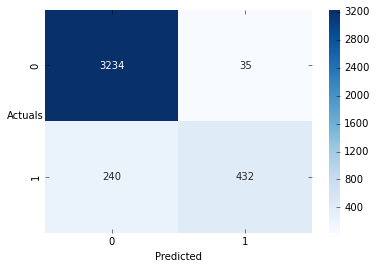

In [117]:
sns.heatmap((metrics.confusion_matrix(y_train, y_XGB_model_train_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_train, y_XGB_model_train_predict))

Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1413
           1       0.82      0.58      0.68       276

    accuracy                           0.91      1689
   macro avg       0.87      0.78      0.81      1689
weighted avg       0.91      0.91      0.90      1689



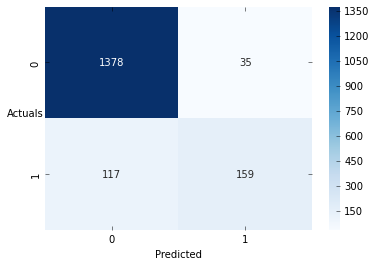

In [118]:
sns.heatmap((metrics.confusion_matrix(y_test, y_XGB_model_test_predict)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print('Classification Report','\n',metrics.classification_report(y_test, y_XGB_model_test_predict))

AUC: 0.944


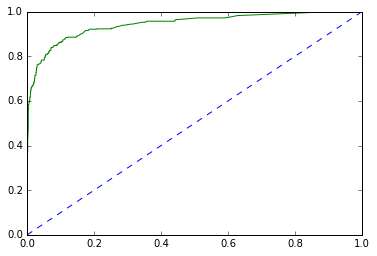

In [119]:
# predict probabilities
probs_XGB_model_train = XGB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_XGB_model_train = probs_XGB_model_train[:, 1]
# calculate AUC
auc_XGB_model_train = roc_auc_score(y_train, probs_XGB_model_train)
print('AUC: %.3f' % auc_XGB_model_train)
# calculate roc curve
train_fpr_XGB_model, train_tpr_XGB_model, train_thresholds_XGB_model = roc_curve(y_train, probs_XGB_model_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_XGB_model, train_tpr_XGB_model)

AUC: 0.915


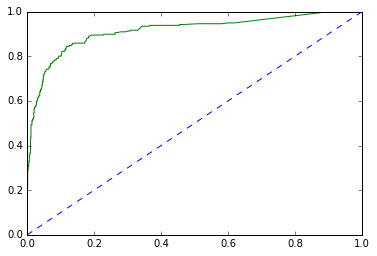

In [120]:
# predict probabilities
probs_XGB_model_test = XGB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_XGB_model_test = probs_XGB_model_test[:, 1]
# calculate AUC
auc_XGB_model_test = roc_auc_score(y_test, probs_XGB_model_test)
print('AUC: %.3f' % auc_XGB_model_test)
# calculate roc curve
test_fpr_XGB_model, test_tpr_XGB_model, test_thresholds_XGB_model = roc_curve(y_test, probs_XGB_model_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_XGB_model, test_tpr_XGB_model)

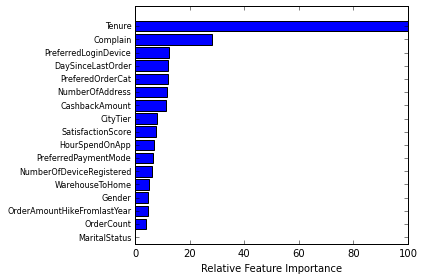

In [121]:
feature_importance = XGB_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
sort = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure()
mod = fig.add_subplot(1, 1, 1)
mod.barh(sort, feature_importance[sorted_idx], align='center')
mod.set_yticks(sort)
mod.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
mod.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

In [122]:
#Model tuning
from sklearn.model_selection import cross_val_score

In [123]:
scores_log_train = cross_val_score(model_log, X_train, y_train, cv=10)
scores_log_train

array([0.76455696, 0.75380711, 0.77411168, 0.8071066 , 0.76395939,
       0.71573604, 0.77411168, 0.74873096, 0.81472081, 0.79441624])

In [124]:
scores_log_test = cross_val_score(model_log, X_test, y_test, cv=10)
scores_log_test

array([0.80473373, 0.75147929, 0.76923077, 0.78698225, 0.82840237,
       0.81065089, 0.76331361, 0.74556213, 0.81065089, 0.76190476])

In [125]:
scores_lda_train = cross_val_score(model_lda, X_train, y_train, cv=10)
scores_lda_train

array([0.85063291, 0.88832487, 0.85786802, 0.87817259, 0.85025381,
       0.85786802, 0.8680203 , 0.8857868 , 0.8857868 , 0.88324873])

In [126]:
scores_lda_test = cross_val_score(model_lda, X_test, y_test, cv=10)
scores_lda_test

array([0.86982249, 0.86982249, 0.8816568 , 0.89349112, 0.87573964,
       0.89349112, 0.86982249, 0.86982249, 0.86390533, 0.88095238])

In [127]:
scores_knn_train = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores_knn_train

array([0.86835443, 0.86294416, 0.84263959, 0.86040609, 0.85025381,
       0.85279188, 0.86294416, 0.87309645, 0.86294416, 0.87055838])

In [128]:
scores_knn_test = cross_val_score(KNN_model, X_test, y_test, cv=10)
scores_knn_test

array([0.88757396, 0.84615385, 0.86390533, 0.82248521, 0.86390533,
       0.88757396, 0.84023669, 0.79881657, 0.82840237, 0.83928571])

In [129]:
scores_nb_train = cross_val_score(NB_model, X_train, y_train, cv=10)
scores_nb_train

array([0.80759494, 0.85025381, 0.85025381, 0.87309645, 0.84771574,
       0.81472081, 0.85532995, 0.84771574, 0.88832487, 0.86548223])

In [130]:
scores_nb_test = cross_val_score(NB_model, X_test, y_test, cv=10)
scores_nb_test

array([0.84615385, 0.84615385, 0.86390533, 0.86982249, 0.89349112,
       0.85207101, 0.83431953, 0.84023669, 0.86982249, 0.83928571])

In [131]:
scores_svm_train = cross_val_score(SVM_model, X_train, y_train, cv=10)
scores_svm_train

array([0.85316456, 0.90101523, 0.85786802, 0.87563452, 0.85532995,
       0.8680203 , 0.87563452, 0.8857868 , 0.88832487, 0.88324873])

In [132]:
scores_svm_test = cross_val_score(SVM_model, X_test, y_test, cv=10)
scores_svm_test

array([0.88757396, 0.86982249, 0.88757396, 0.8816568 , 0.86982249,
       0.89349112, 0.8816568 , 0.86390533, 0.89940828, 0.89285714])

In [133]:
scores_ann_train = cross_val_score(clf_ann, X_train, y_train, cv=10)
scores_ann_train

Iteration 1, loss = 5.22201956
Iteration 2, loss = 0.38138093
Iteration 3, loss = 0.36853717
Iteration 4, loss = 0.36492020
Iteration 5, loss = 0.36190280
Iteration 6, loss = 0.36153440
Iteration 7, loss = 0.36043441
Iteration 8, loss = 0.36014582
Iteration 9, loss = 0.35750339
Iteration 10, loss = 0.35650756
Iteration 11, loss = 0.35591396
Iteration 12, loss = 0.35373948
Iteration 13, loss = 0.35436976
Iteration 14, loss = 0.35302318
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 5.45160779
Iteration 2, loss = 0.38652071
Iteration 3, loss = 0.37917751
Iteration 4, loss = 0.37228009
Iteration 5, loss = 0.36844045
Iteration 6, loss = 0.36526398
Iteration 7, loss = 0.36509700
Iteration 8, loss = 0.36226821
Iteration 9, loss = 0.36127982
Iteration 10, loss = 0.35997060
Iteration 11, loss = 0.35896322
Iteration 12, loss = 0.35907761
Iteration 13, loss = 0.35776104
Training loss did not improve more than tol=0.010000 for 10 cons

array([0.85316456, 0.85279188, 0.84771574, 0.85532995, 0.84010152,
       0.82741117, 0.89340102, 0.8680203 , 0.85025381, 0.85279188])

In [134]:
scores_ann_test = cross_val_score(clf_ann, X_test, y_test, cv=10)
scores_ann_test

Iteration 1, loss = 8.51112163
Iteration 2, loss = 2.88267956
Iteration 3, loss = 1.06588923
Iteration 4, loss = 0.38385339
Iteration 5, loss = 0.36345236
Iteration 6, loss = 0.36042287
Iteration 7, loss = 0.35732090
Iteration 8, loss = 0.35655346
Iteration 9, loss = 0.35414128
Iteration 10, loss = 0.35346303
Iteration 11, loss = 0.35199214
Iteration 12, loss = 0.35070722
Iteration 13, loss = 0.34894288
Iteration 14, loss = 0.34929989
Iteration 15, loss = 0.34873160
Iteration 16, loss = 0.34623568
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 8.69427650
Iteration 2, loss = 2.44538075
Iteration 3, loss = 1.92088276
Iteration 4, loss = 0.37929756
Iteration 5, loss = 0.36587329
Iteration 6, loss = 0.36244018
Iteration 7, loss = 0.35941477
Iteration 8, loss = 0.35721887
Iteration 9, loss = 0.35498370
Iteration 10, loss = 0.35360364
Iteration 11, loss = 0.35264800
Iteration 12, loss = 0.35034501
Iteration 13, loss = 0.34870187


array([0.87573964, 0.86982249, 0.85207101, 0.84615385, 0.84023669,
       0.83431953, 0.83431953, 0.84023669, 0.84023669, 0.85119048])

In [135]:
scores_best_grid_rf_train = cross_val_score(best_grid_rf, X_train, y_train, cv=10)
scores_best_grid_rf_train

array([0.89113924, 0.90862944, 0.9035533 , 0.91370558, 0.89340102,
       0.8857868 , 0.92639594, 0.91370558, 0.90609137, 0.90862944])

In [136]:
scores_best_grid_rf_test = cross_val_score(best_grid_rf, X_test, y_test, cv=10)
scores_best_grid_rf_test

array([0.90532544, 0.89940828, 0.88757396, 0.86390533, 0.92899408,
       0.91715976, 0.8816568 , 0.8816568 , 0.89940828, 0.92261905])

In [137]:
scores_ADB_train = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores_ADB_train

array([0.88607595, 0.89847716, 0.89340102, 0.90101523, 0.88324873,
       0.8857868 , 0.9035533 , 0.91370558, 0.9035533 , 0.89086294])

In [138]:
scores_ADB_test = cross_val_score(ADB_model, X_test, y_test, cv=10)
scores_ADB_test

array([0.89349112, 0.90532544, 0.88757396, 0.88757396, 0.89349112,
       0.89940828, 0.88757396, 0.88757396, 0.91715976, 0.88690476])

In [139]:
scores_XGB_train = cross_val_score(XGB_model, X_train, y_train, cv=10)
scores_XGB_train

array([0.90126582, 0.9035533 , 0.90609137, 0.92385787, 0.88071066,
       0.87055838, 0.9213198 , 0.90862944, 0.89340102, 0.89593909])

In [140]:
scores_XGB_test = cross_val_score(XGB_model, X_test, y_test, cv=10)
scores_XGB_test

array([0.9112426 , 0.92307692, 0.8816568 , 0.86390533, 0.91715976,
       0.91715976, 0.89940828, 0.8816568 , 0.9112426 , 0.89880952])